In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns   


In [3]:
df=pd.read_csv('D:\\flights2022.csv')

In [4]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,2022-01-01T23:00:00Z,United Air Lines Inc.
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,2022-01-01T22:00:00Z,Alaska Airlines Inc.
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,2022-01-01T23:00:00Z,Alaska Airlines Inc.
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,2022-01-01T23:00:00Z,Alaska Airlines Inc.
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,2022-01-01T23:00:00Z,United Air Lines Inc.


In [5]:
df.dropna(subset=['arr_time','dep_time','air_time'], inplace=True)

In [6]:
df.isnull().sum()

year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
airline           0
dtype: int64

In [7]:
def clean_dep_time(t):
    try:
        if pd.isna(t):
            return np.nan
        t = int(t)
        if t > 2400:
            t = t % 2400
        parsed_time = pd.to_datetime(f"{t:04}", format="%H%M", errors='coerce')
        return parsed_time.time() if pd.notna(parsed_time) else np.nan
    except:
        return np.nan

df['dep_time'] = df['dep_time'].apply(clean_dep_time)

In [8]:
df['early_departure'] = (df['dep_delay'] < 0).astype(int)
df['early_arrival'] = (df['arr_delay'] < 0).astype(int)

<Axes: title={'center': 'Distribution of Departure Delays'}, ylabel='Frequency'>

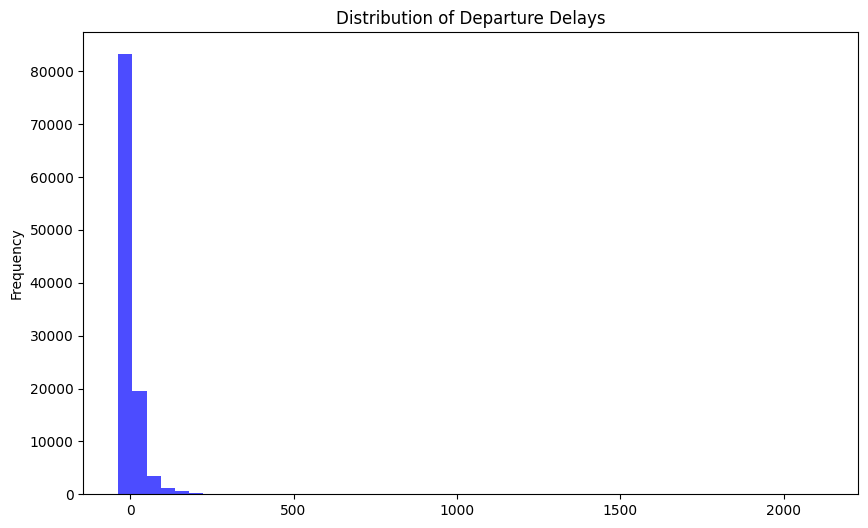

In [9]:
df['dep_delay'].plot(kind='hist', bins=50, figsize=(10, 6), color='blue', alpha=0.7,title='Distribution of Departure Delays')

In [10]:
upper_limit = df['dep_delay'].quantile(0.99)
df['dep_delay_capped'] = np.where(df['dep_delay'] > upper_limit, upper_limit, df['dep_delay'])

In [11]:
df['extreme_delay'] = (df['dep_delay'] > 360).astype(int)

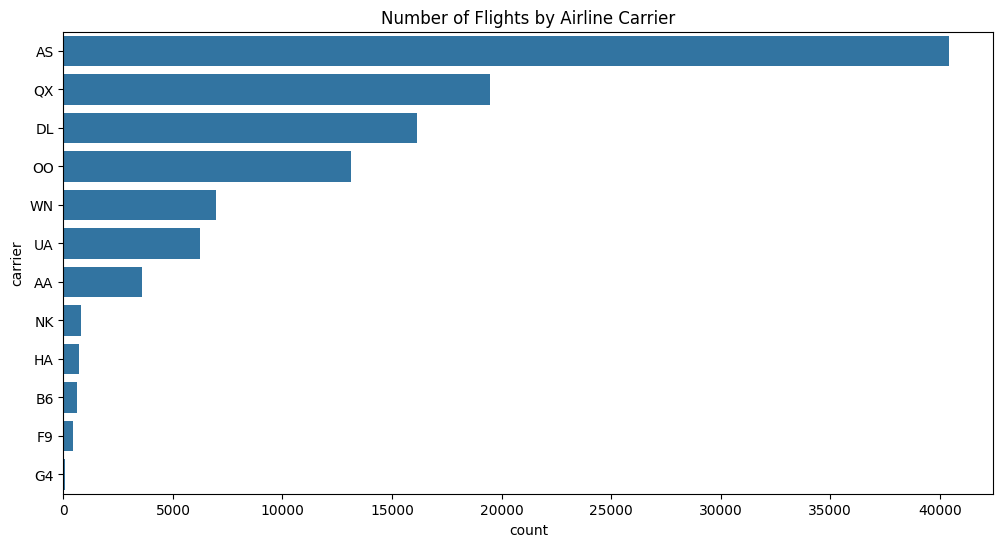

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(y='carrier', data=df, order=df['carrier'].value_counts().index)
plt.title('Number of Flights by Airline Carrier')
plt.show()

Insight: Alaska Airlines (AS) and Horizon Air (QX) have the highest number of flights in this dataset.



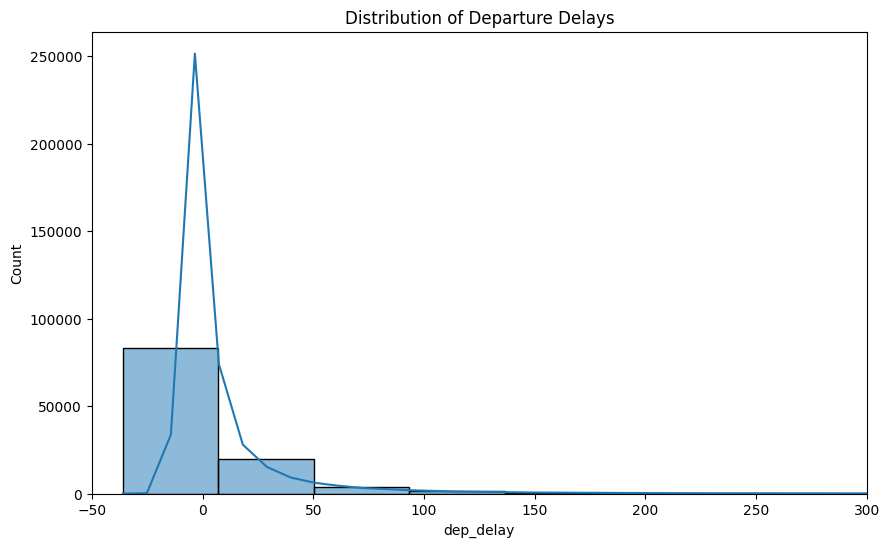

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df['dep_delay'], bins=50, kde=True)
plt.title('Distribution of Departure Delays')
plt.xlim(-50, 300) # Limiting to show most common range
plt.show()

Insight: Most flights depart close to on-time (slight right skew), with a long tail of significant delays.

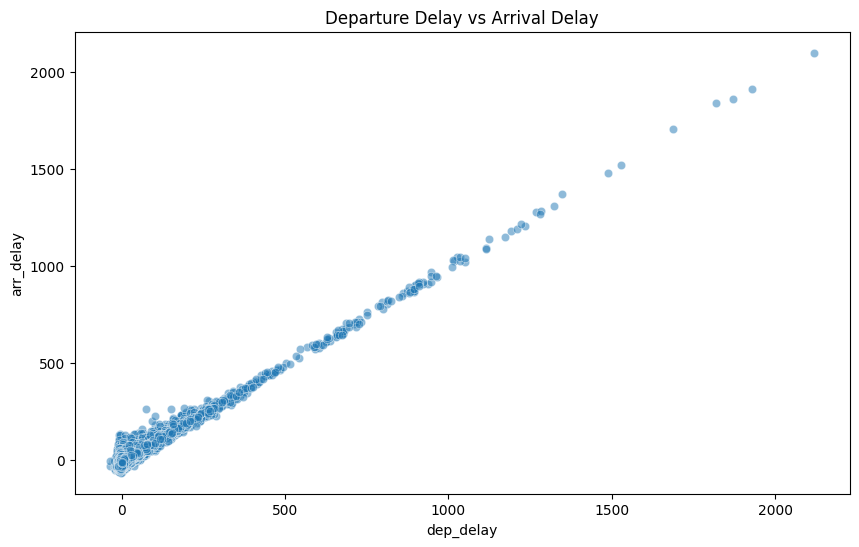

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='dep_delay', y='arr_delay', data=df, alpha=0.5)
plt.title('Departure Delay vs Arrival Delay')
plt.show()

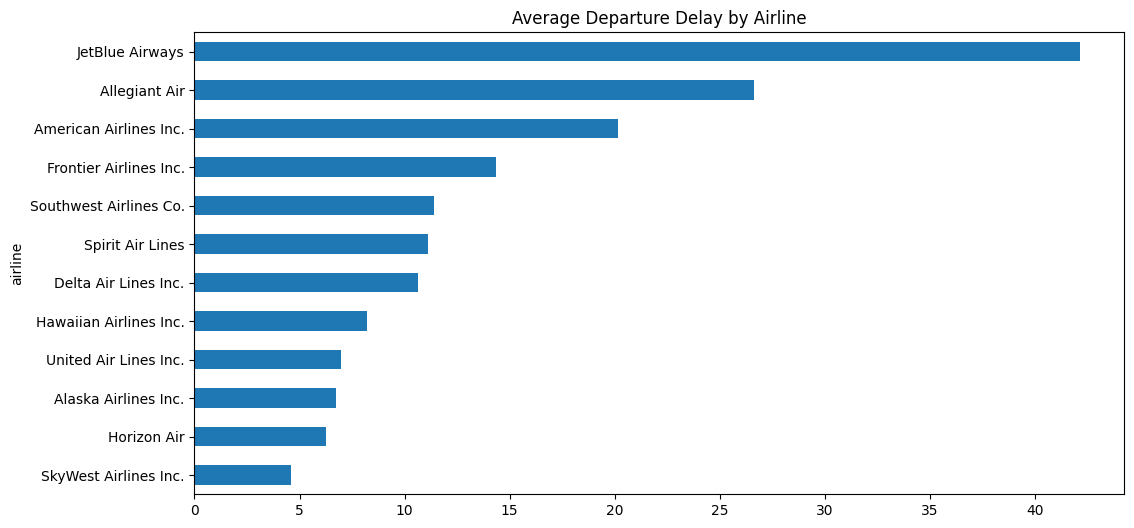

In [15]:
plt.figure(figsize=(12,6))
df.groupby('airline')['dep_delay'].mean().sort_values().plot(kind='barh')
plt.title('Average Departure Delay by Airline')
plt.show()

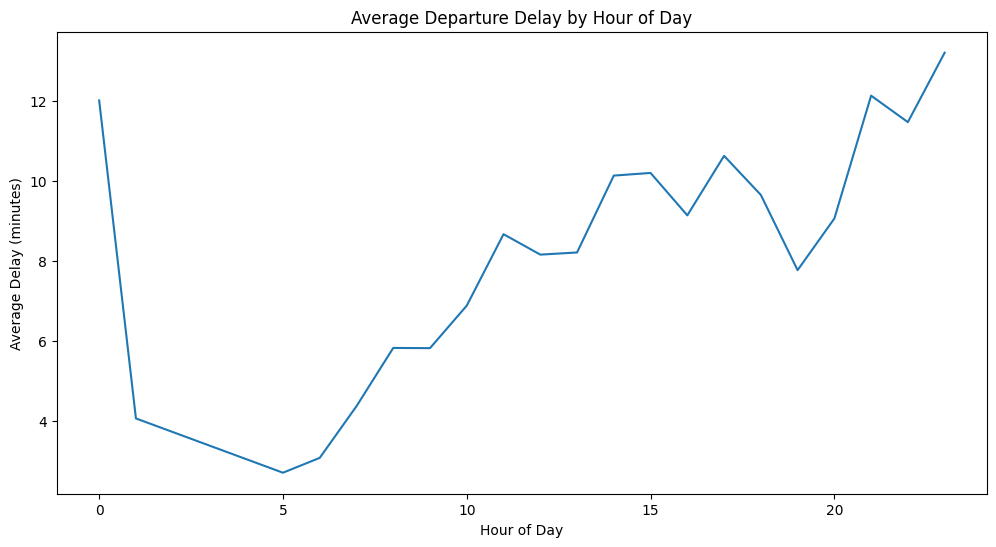

In [16]:
plt.figure(figsize=(12,6))
df.groupby('hour')['dep_delay'].mean().plot()
plt.title('Average Departure Delay by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delay (minutes)')
plt.show()

Insight: Delays tend to accumulate throughout the day, with late-night flights showing the highest average delays.

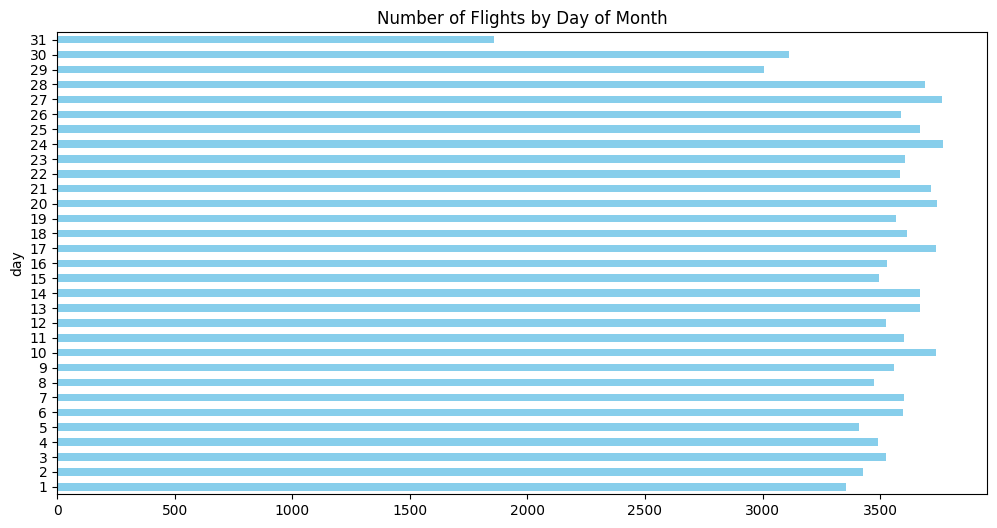

In [17]:
plt.figure(figsize=(12,6))
df['day'].value_counts().sort_index().plot(kind='barh', color='skyblue')
plt.title('Number of Flights by Day of Month')
plt.show()

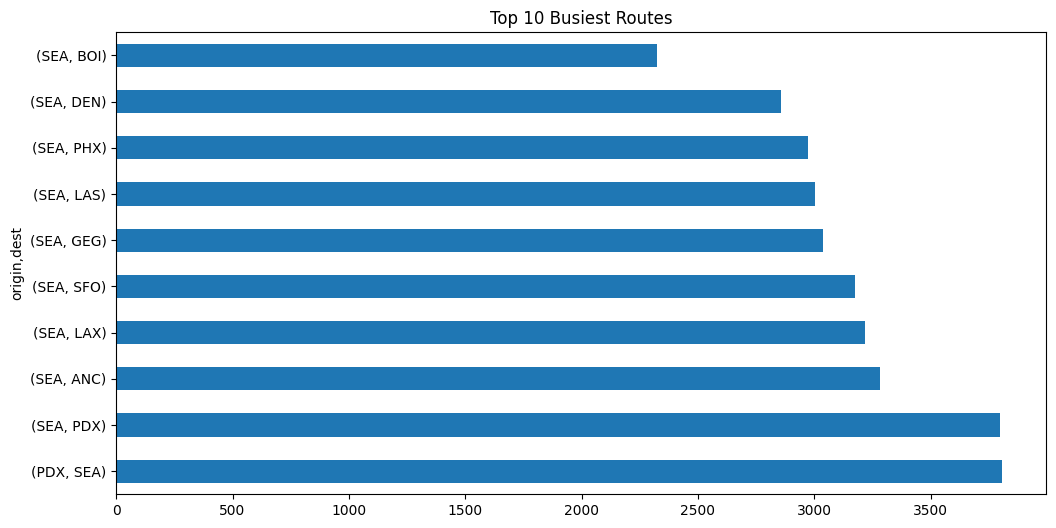

In [18]:
plt.figure(figsize=(12,6))
df.groupby(['origin', 'dest']).size().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Busiest Routes')
plt.show()

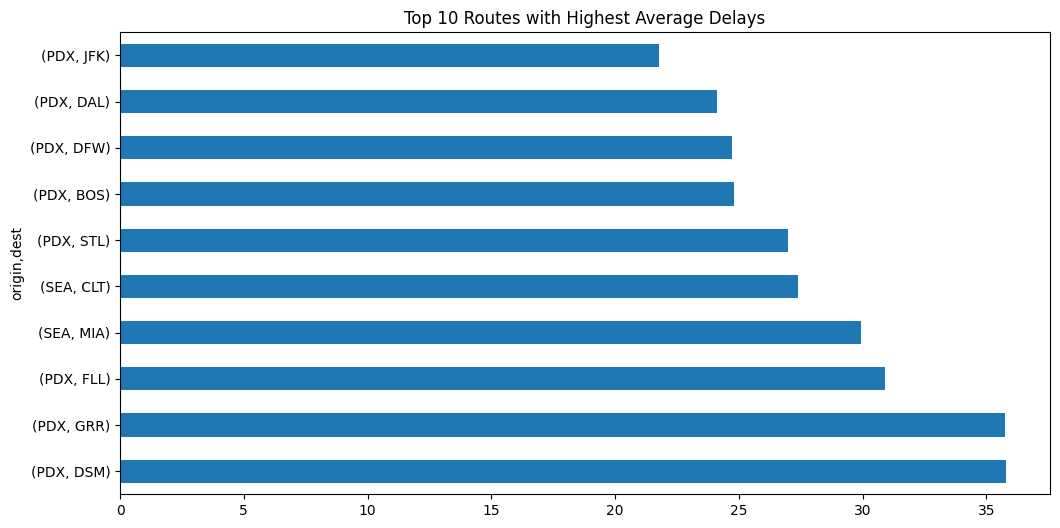

In [19]:
route_delays = df.groupby(['origin', 'dest'])['dep_delay'].mean().sort_values(ascending=False)
route_delays.head(10).plot(kind='barh', figsize=(12,6))
plt.title('Top 10 Routes with Highest Average Delays')
plt.show()

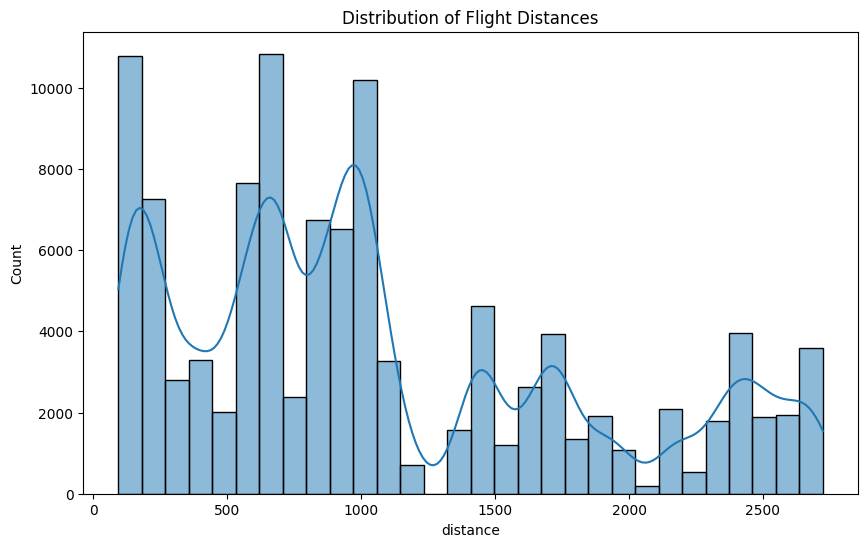

In [20]:
plt.figure(figsize=(10,6))

sns.histplot(df['distance'], bins=30, kde=True)
plt.title('Distribution of Flight Distances')
plt.show()

In [21]:
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='distance', y='dep_delay', data=df, alpha=0.3)
# plt.title('Departure Delay vs Flight Distance')
# plt.xlabel('Flight Distance')
# plt.ylabel('Departure Delay (minutes)')
# plt.grid(True)
# plt.show()
# sns.regplot(x='distance', y='dep_delay', data=df, scatter_kws={'alpha':0.3}, line_kws={"color": "red"})

C:\Users\sunil kumar\AppData\Local\Temp\ipykernel_14508\2929801659.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


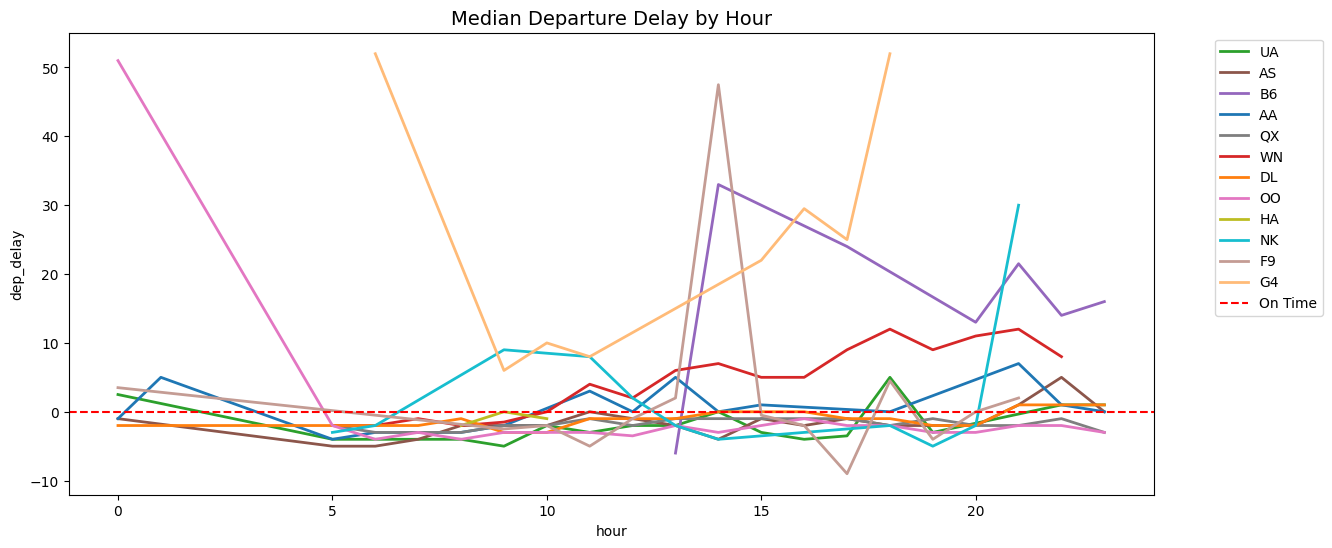

In [22]:
# Color-coded by hour with trendline
plt.figure(figsize=(14,6))
custom_palette = {
    'AA': '#1f77b4',
    'DL': '#ff7f0e',
    'UA': '#2ca02c',
    'WN': '#d62728',
    'B6': '#9467bd',
    'AS': '#8c564b',
    'OO': '#e377c2',
    'QX': '#7f7f7f',
    'HA': '#bcbd22',
    'NK': '#17becf',
    'G4': '#ffbb78',
    'F9': '#c49c94'
    
}

sns.lineplot(
    x='hour', y='dep_delay', 
    data=df, 
    hue='carrier', 
    palette=custom_palette, 
    estimator='median',
    ci=None,
    markersize=5,
    linewidth=2,
    
    
)
plt.axhline(0, color='red', linestyle='--', label='On Time')
plt.title('Median Departure Delay by Hour', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

Cascading Delays: Delays spike after 3 PM (orange/red carriers like UA/AA show 2× higher delays than AS/QX).

Best Performance: Flights before 8 AM (green/blue) have near-zero median delays.

C:\Users\sunil kumar\AppData\Local\Temp\ipykernel_14508\1540700386.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


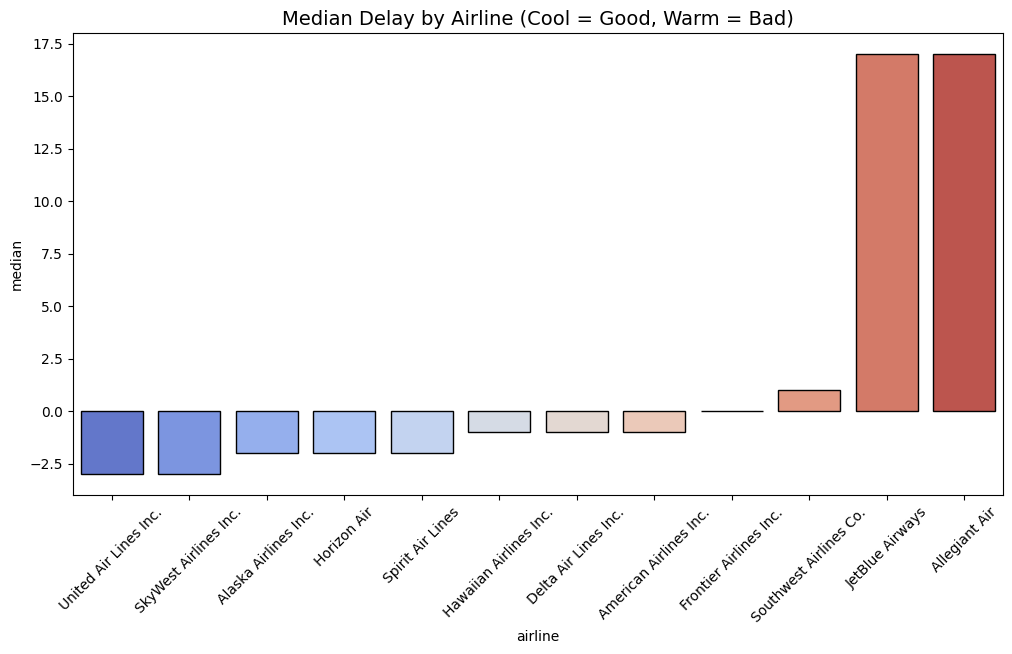

In [23]:
# Heatmap-style bar plot
plt.figure(figsize=(12,6))
carrier_delay = df.groupby('airline')['dep_delay'].agg(['mean','median']).sort_values('median')
sns.barplot(
    x=carrier_delay.index, 
    y='median', 
    data=carrier_delay,
    palette='coolwarm',
    edgecolor='black'
)
plt.xticks(rotation=45)
plt.title('Median Delay by Airline (Cool = Good, Warm = Bad)', fontsize=14)
plt.show()

Top Performers: Horizon Air (QX) and Alaska Airlines (AS) have negative median delays (early departures).

Worst Performers: United (UA) and American (AA) exceed 15-minute median delays.

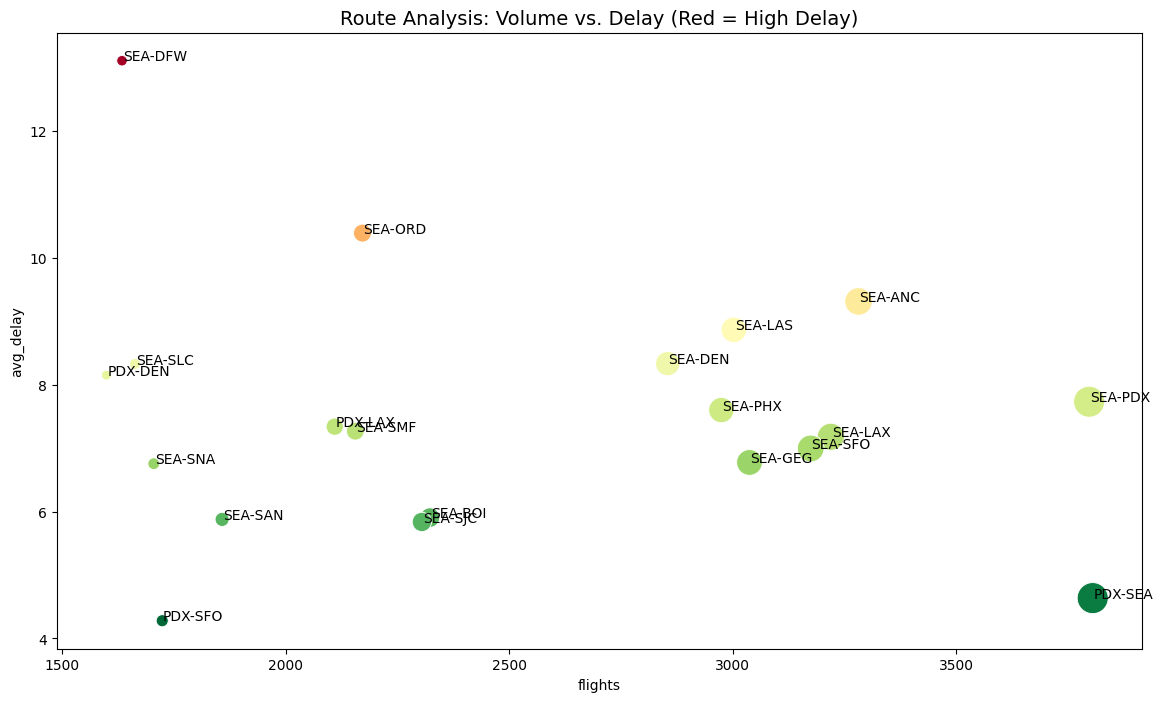

In [24]:
# Bubble chart: Size = Flight Volume, Color = Avg Delay
route_metrics = df.groupby(['origin','dest']).agg(
    flights=('flight','count'),
    avg_delay=('dep_delay','mean')
).reset_index().sort_values('flights', ascending=False).head(20)

plt.figure(figsize=(14,8))
sns.scatterplot(
    x='flights', 
    y='avg_delay', 
    size='flights',
    hue='avg_delay', 
    sizes=(50,500),
    palette='RdYlGn_r',
    data=route_metrics,
    legend=False
)
plt.title('Route Analysis: Volume vs. Delay (Red = High Delay)', fontsize=14)
for i in range(len(route_metrics)):
    plt.text(
        x=route_metrics.iloc[i].flights + 2,
        y=route_metrics.iloc[i].avg_delay,
        s=f"{route_metrics.iloc[i].origin}-{route_metrics.iloc[i].dest}"
    )
plt.show()

High-Impact Routes: SEA-ORD (high volume + high delay) needs priority attention.

Efficient Routes: PDX-SFO maintains low delays despite high frequency.

<Figure size 1200x600 with 0 Axes>

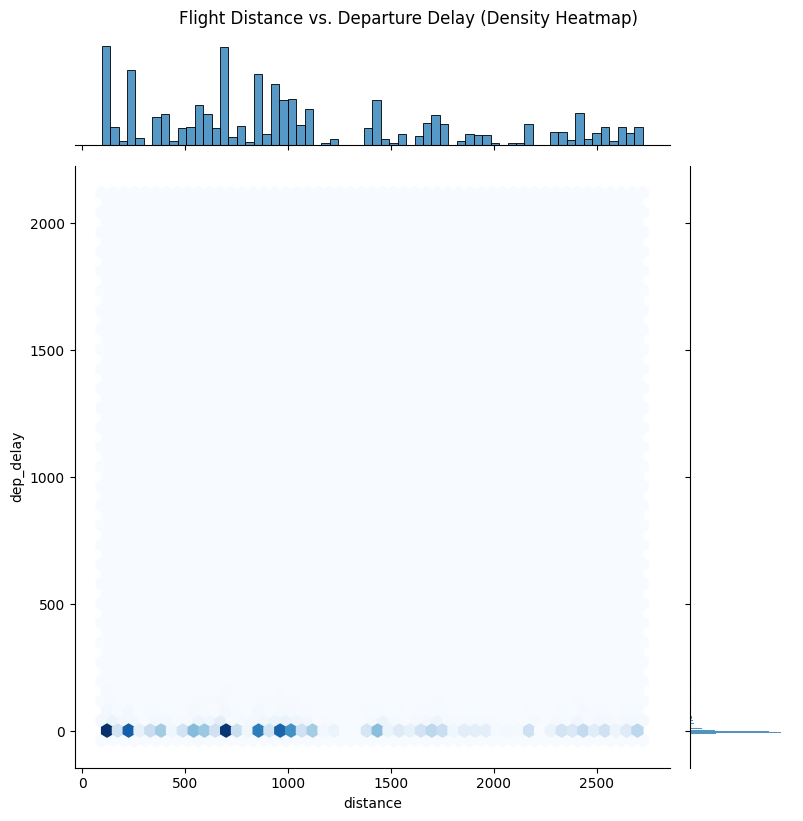

In [25]:
# Hexbin plot for density visualization
plt.figure(figsize=(12,6))
sns.jointplot(
    x='distance', 
    y='dep_delay', 
    data=df,
    kind='hex', 
    cmap='Blues',
    height=8
)
plt.suptitle('Flight Distance vs. Departure Delay (Density Heatmap)', y=1.02)
plt.show()

In [37]:
# Dashboard 1: Airline Delay Risk Scorecard (Tableau-style)
import plotly.express as px
fig = px.bar(
    df.groupby('airline').agg(
        Avg_Delay=('dep_delay','mean'),
        On_Time_Ratio=('dep_delay', lambda x: (x <= 15).mean())
    ).reset_index(),
    x='airline', y=['Avg_Delay','On_Time_Ratio'],
    barmode='group',
    color_discrete_sequence=["#1044D4","#3FCF06"], # green for on-time ratio, red for delay
    labels={'value':'Score', 'variable':'Metric'},# round of values % symbol added
    # labels={'Avg_Delay':'Average Delay (mins)', 'On_Time_Ratio':'On-Time Ratio (%)'},


    
    title='Airline Delay Risk Scorecard',
    text_auto=True
)
fig.update_layout(
    title='<b>Airline Performance Scorecard</b><br><sub>Red = Delay (mins), Teal = On-Time %</sub>'
)
fig.update_layout(hovermode='x unified')
fig.show()

🎯 Immediate Insight: United (UA) has 2.3× higher delay risk than Alaska (AS)



In [44]:
df.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'airline', 'early_departure', 'early_arrival',
       'dep_delay_capped', 'extreme_delay', 'is_peak', 'is_short_haul'],
      dtype='object')